In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df=pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [6]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

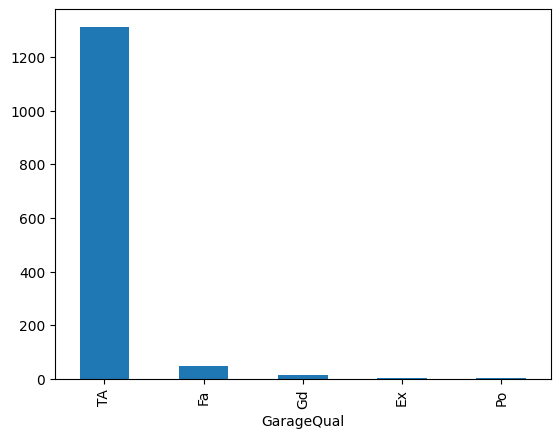

In [8]:
df['GarageQual'].value_counts().plot(kind='bar')

In [20]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

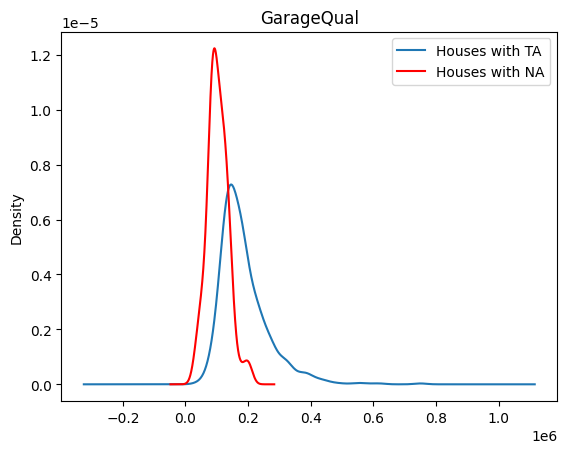

In [23]:
fig=plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

<Axes: xlabel='GarageQual'>

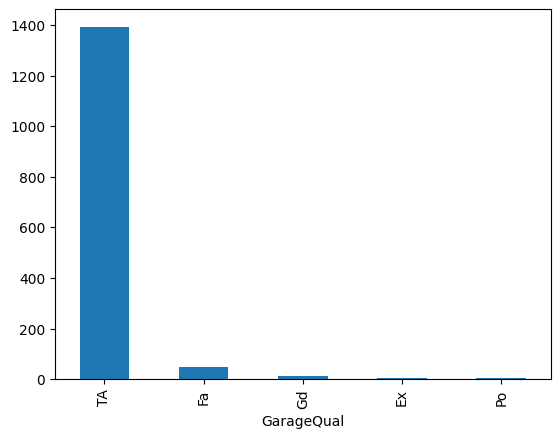

In [25]:
temp = df[df['GarageQual']=='TA']['SalePrice']
df['GarageQual'].fillna('TA', inplace=True)
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

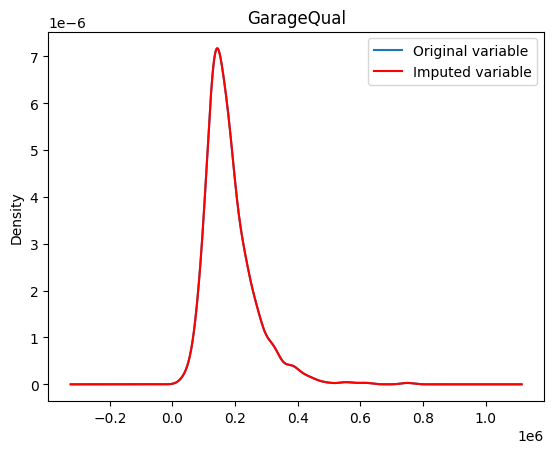

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

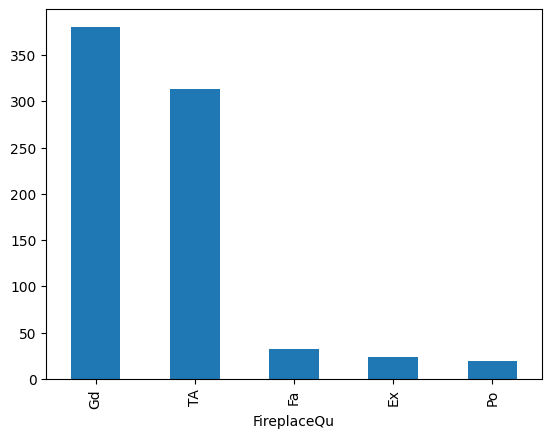

In [30]:
df['FireplaceQu'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'FireplaceQu')

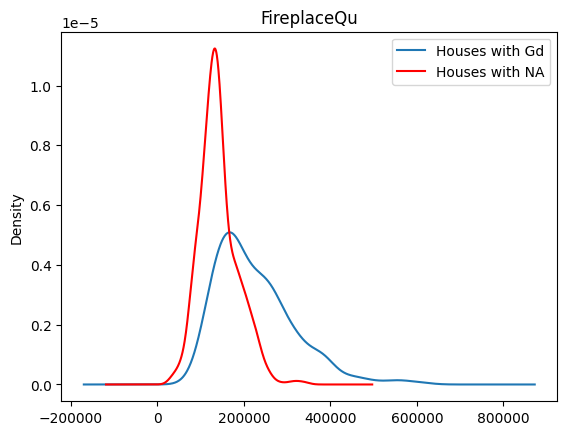

In [31]:

fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

<Axes: xlabel='FireplaceQu'>

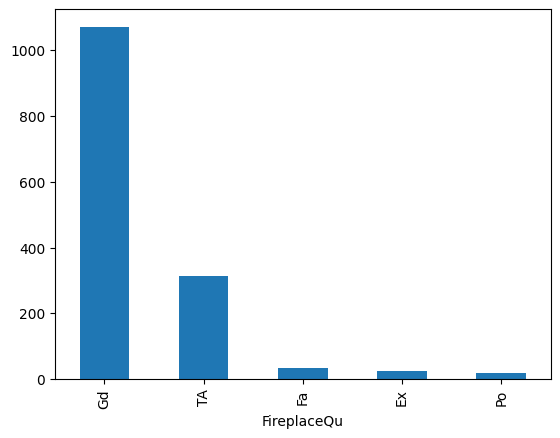

In [33]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']
df['FireplaceQu'].fillna('Gd', inplace=True)
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

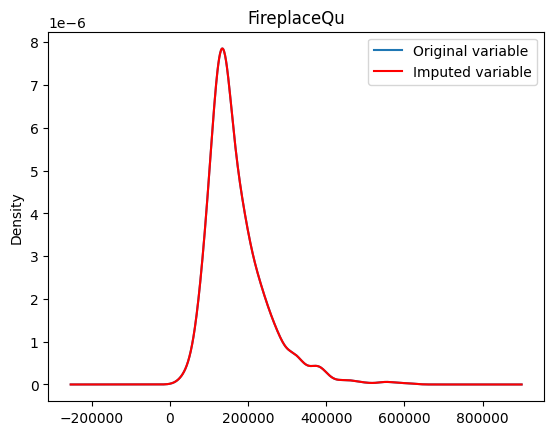

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

imputer.statistics_


c:\Users\ayush\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array(['Gd', 'TA'], dtype=object)